In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

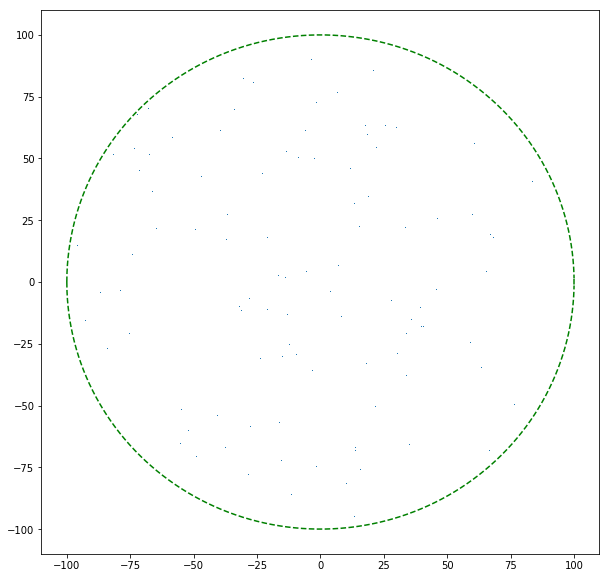

In [2]:
# A = 5 
# B = 9
N = 100
radius = 100
h = 0.01 #step
delta = 0.1
# alpha= 2
epsilon=1/4 /radius ** 2

old_coords=coordinates_of_all_points = np.random.normal(loc = (0, 0),size =(N, 2))*radius
old_veloc =velocities_of_all_points = np.random.rand(N, 2)

while (np.sum(np.linalg.norm(coordinates_of_all_points, axis = 1)>radius)>0):
    length = np.sum(np.linalg.norm(coordinates_of_all_points, axis = 1)>radius)
    substitution_matrix = np.random.normal(loc = (0, 0),size =(length, 2))* radius
    coordinates_of_all_points[np.linalg.norm(coordinates_of_all_points, axis = 1)>radius] = substitution_matrix

# print("Coordinates of all points:\n", coordinates_of_all_points, \
#       "\n\nVelocities of all points:\n", velocities_of_all_points)
x_boundary = np.arange(-radius, radius, 0.01)
y_boundary = np.sqrt(radius**2 - x_boundary**2)
plt.figure(figsize=(10,10))
plt.plot(coordinates_of_all_points[:,0], coordinates_of_all_points[:,1], ",")
plt.plot(x_boundary, y_boundary, "g--")
plt.plot([radius, radius], [y_boundary[-1], -y_boundary[-1]], "g--")
plt.plot(x_boundary, -y_boundary, "g--")
plt.show()

In [3]:
# def new_coordinates()

## FMM function: 

In [4]:
def acceleration(eta, epsilon, alpha):
    return (eta / ((np.linalg.norm(eta) + epsilon)**alpha))

In [5]:
eta = np.ones(2)
eta = np.ones(2)
norm_eta = np.sqrt(2)



    
def find_FMM_acceleration(A, B, point_ID, delta_velocity, delta_time):
    velocity = velocities_of_all_points[point_ID] + delta_velocity #Runge-Kutta
    FMM_accel = (   A-B*np.power(np.linalg.norm(velocity), 2)   )*velocity
    
    x_i = velocity * delta_time + coordinates_of_all_points[point_ID] #Runge-Kutta

    
    middles, circle_IDsets_of_point, M = circle_clusterization(point_ID)
    for k in range(M):
        term_1 = acceleration(- middles[k] + x_i, epsilon, alpha)
        
        for body_ID in circle_IDsets_of_point[k]:
            x_j = velocities_of_all_points[body_ID] * delta_time + coordinates_of_all_points[body_ID] #Runge-Kutta
            term_3 = (x_j - middles[k])/(x_i - middles[k] + epsilon)
            FMM_accel += term_1 * (zero_derivative + first_derivative * term_3)
    return FMM_accel

In [6]:
def force_of_interaction(velocity1, point_ID1, point_ID2, delta_time):
    old_coord_diff = coordinates_of_all_points[point_ID2]- coordinates_of_all_points[point_ID1]
    old_velocity_diff = velocities_of_all_points[point_ID2]- velocity1
    new_coord_diff = old_velocity_diff * delta_time + old_coord_diff
    return new_coord_diff/np.power(np.linalg.norm(new_coord_diff), alpha)

In [7]:
def find_acceleration(point_ID, delta_velocity, delta_time):
    velocity = velocities_of_all_points[point_ID] + delta_velocity
    return (   A-B*np.power(np.linalg.norm(velocity), 2)   )*velocity+\
            np.sum([force_of_interaction(velocity, point_ID, body_ID, delta_time) if body_ID != point_ID else [0, 0] for body_ID in np.arange(N)], axis = 0)

In [8]:
def k_1_computation(A, B, point_ID):
    return h*find_FMM_acceleration(A, B, point_ID, 0, 0)

In [9]:
def k_2_computation(A, B, point_ID):
    return h*find_FMM_acceleration(A, B, point_ID, k_1_computation(A, B, point_ID), h)

In [10]:
def update_velocity(A, B, point_ID):
    return velocities_of_all_points[point_ID] + (k_1_computation(A, B, point_ID) + k_2_computation(A, B, point_ID))/2

In [11]:
def reflection(point_ID):
    p = coordinates_of_all_points[point_ID]
    v = velocities_of_all_points[point_ID]
    HH = v
    if np.dot(v, p) > 0:
        normal_vec = p / np.linalg.norm(p)
        normal_vec = normal_vec.reshape(-1, 1)
        Householder_matrix = np.identity(2) - 2 * normal_vec @ normal_vec.T
        HH = Householder_matrix @ v
    return HH

In [12]:
# velocities_of_all_points = np.asarray([update_velocity(point_ID) for point_ID in np.arange(N)])
# coordinates_of_all_points -= velocities_of_all_points * h

In [13]:
# print("Coordinates of all points:\n", coordinates_of_all_points, \
#       "\n\nVelocities of all points:\n", velocities_of_all_points)


In [ ]:
plt.close('all')
arrow_scale = 3

alpha_array = [1]#, 2, 3, 4]
epsilon_array = [1e-4]#, 1e-3, 1e-2, 1e-1]



AB_array =  [5]#np.arange(0, 10, 1)

diff_time = []
for alpha in alpha_array:
    for epsilon in epsilon_array:
        scalar_coefficient = np.power(norm_eta + epsilon, float(-alpha))
        zero_derivative = scalar_coefficient
        first_derivative = scalar_coefficient * (1 - alpha/(norm_eta + epsilon)/norm_eta)


        for A in AB_array:
            for B in AB_array:
#                 coordinates_of_all_points = old_coords
#                 velocities_of_all_points = old_veloc
                for j in range(100000):
                    time_start = time()
                    plt.close('all')
                    velocities_of_all_points = np.asarray([update_velocity(A, B, point_ID) for point_ID in np.arange(N)])

                    plt.figure(figsize=(10,10))
                    plt.plot(coordinates_of_all_points[:,0], coordinates_of_all_points[:,1], ",")
                    for i in range(N):
                        plt.arrow(coordinates_of_all_points[i,0], coordinates_of_all_points[i,1], velocities_of_all_points[i,0] * arrow_scale, velocities_of_all_points[i,1] * arrow_scale, shape='full', lw=0.5, length_includes_head=True, head_width=1)

                    
                    indices = coordinates_of_all_points[:,0]**2 + coordinates_of_all_points[:,1]**2 > (radius*(1- delta))**2 

                    point_ID = 0
                    for ind in indices:
                        if ind == True:
                #             plt.plot(x_boundary, y_boundary, "g--")
                #             plt.plot([radius, radius], [y_boundary[-1], -y_boundary[-1]], "g--")
                #             plt.plot(x_boundary, -y_boundary, "g--")
                #             plt.title("Frame #%i. Reflection of %i" % (j, point_ID))
                #             plt.savefig(('images/%i.%i.png'% (j, point_ID)))
                #             plt.show()
                            velocities_of_all_points[point_ID]= reflection(point_ID)            
                #             plt.figure(figsize=(10,10))
                #             plt.plot(coordinates_of_all_points[:,0], coordinates_of_all_points[:,1], ",")
                #             for i in range(N):
                #                 plt.arrow(coordinates_of_all_points[i,0], coordinates_of_all_points[i,1], velocities_of_all_points[i,0] * arrow_scale, velocities_of_all_points[i,1] * arrow_scale, shape='full', lw=0.5, length_includes_head=True, head_width=1)
                        point_ID += 1
                    
                    coordinates_of_all_points += velocities_of_all_points * h
                    
                    indices = coordinates_of_all_points[:,0]**2 + coordinates_of_all_points[:,1]**2 > (radius*(1- delta))**2 

                    point_ID = 0
                    for ind in indices:
                        if ind == True:
                #             plt.plot(x_boundary, y_boundary, "g--")
                #             plt.plot([radius, radius], [y_boundary[-1], -y_boundary[-1]], "g--")
                #             plt.plot(x_boundary, -y_boundary, "g--")
                #             plt.title("Frame #%i. Reflection of %i" % (j, point_ID))
                #             plt.savefig(('images/%i.%i.png'% (j, point_ID)))
                #             plt.show()
                            velocities_of_all_points[point_ID]= reflection(point_ID)            
                #             plt.figure(figsize=(10,10))
                #             plt.plot(coordinates_of_all_points[:,0], coordinates_of_all_points[:,1], ",")
                #             for i in range(N):
                #                 plt.arrow(coordinates_of_all_points[i,0], coordinates_of_all_points[i,1], velocities_of_all_points[i,0] * arrow_scale, velocities_of_all_points[i,1] * arrow_scale, shape='full', lw=0.5, length_includes_head=True, head_width=1)
                        point_ID += 1
                    

                    if (j % 100) == 0:
                        plt.plot(x_boundary, y_boundary, "g--")
                        plt.plot([radius, radius], [y_boundary[-1], -y_boundary[-1]], "g--")
                        plt.plot(x_boundary, -y_boundary, "g--")
                        plt.title("Frame #%i" % j)
                        plt.savefig(('images5_INV/A=%0.1f B=%0.1f eps=%0.4f alp=%0.1f Frame=%i.png'% (A, B, epsilon, alpha, j) ))
                #     plt.show()
                

                    time_end = time()
                    diff_time.append(time_end - time_start)
#                     print((time_end - time_start))

        
np.savetxt("images5_INV/TIME_A_B_epsilon_alpha.txt", diff_time)
        
        


In [ ]:
a = np.asarray([1, 1])
b = np.asarray([3, 4])
print(np.linalg.norm(eta)== np.sqrt(2))

## Checking

In [ ]:


scalar_coefficient = np.power(norm_eta + epsilon, float(-alpha))
zero_derivative = scalar_coefficient
first_derivative = scalar_coefficient * (1 - alpha/(norm_eta + epsilon)/norm_eta)



def find_FMM_old_acceleration(point_ID, delta_velocity, delta_time, middle=[0, 0]):
    velocity = velocities_of_all_points[point_ID] + delta_velocity #Runge-Kutta
    FMM_accel = (   A-B*np.power(np.linalg.norm(velocity), 2)   )*velocity
    
    x_i = velocity * delta_time + coordinates_of_all_points[point_ID] #Runge-Kutta
    x_i = x_i - middle
    term_1 = acceleration(x_i, epsilon, alpha)   
    
    
    source_IDs = np.arange(N)
    source_IDs = source_IDs[source_IDs != point_ID]
    for body_ID in source_IDs:
        x_j = velocities_of_all_points[body_ID] * delta_time + coordinates_of_all_points[body_ID] #Runge-Kutta
        term_3 = (x_j - middle)/x_i
        FMM_accel += term_1 * (zero_derivative + first_derivative * term_3) 
    return FMM_accel

In [ ]:
accel = [find_acceleration(point_ID, 0, 0) for point_ID in np.arange(N)]
FMM_accel = [find_FMM_acceleration(point_ID, 0, 0) for point_ID in np.arange(N)]

In [ ]:
accel = np.asarray(accel)
FMM_accel = np.asarray(FMM_accel)

In [ ]:
# err = (FMM_accel-accel)/abs(accel)
err = np.linalg.norm(FMM_accel-accel, axis = 1)/np.linalg.norm(accel, axis = 1)
IDs = np.arange(N)
IDs = IDs[err>3]
print(IDs, coordinates_of_all_points[IDs])


plt.plot(err)
plt.show()

vels = np.linalg.norm(velocities_of_all_points, axis = 1)
plt.plot(vels)
# print(vels[IDs])
plt.show()

In [16]:
def find_below_middle_point(point_ID, right):
    if right:
        signature = 1
    else:
        signature = -1
    [x_0, x_1] = coordinates_of_all_points[point_ID]
    sqrt_3 = signature * np.sqrt(3)
    A = 4
    B = - 2 * sqrt_3 *  x_0 - 6 * x_1
    C = x_0 ** 2 + 2 * sqrt_3 * x_0 * x_1 + 3 * x_1 ** 2 - radius ** 2
    D = B ** 2 - 4 * A * C
    if D <  epsilon:
        print("D=", D)
        D = epsilon
    else:
        D = np.sqrt(D)
    middle_1 = - (B + D)/ (2 * A)
    middle_0 = x_0 - sqrt_3 * (middle_1 - x_1)
    return np.asarray([middle_0, middle_1])

def find_upper_middle_point(point_ID):
    [middle_0, x_1] = coordinates_of_all_points[point_ID]
    middle_1 = radius ** 2 - middle_0 ** 2
    if middle_1 <  epsilon:
        print("middle_1=", middle_1)
        middle_1 = epsilon
    else:
        middle_1 = np.sqrt(middle_1)
    return np.asarray([middle_0, middle_1])

In [15]:
plt.close("all")
def circle_clusterization(point_ID):
    middle_up = find_upper_middle_point(point_ID)
    middle_right = find_below_middle_point(point_ID, True)
    middle_left = find_below_middle_point(point_ID, False)
    temporary_IDs = np.setdiff1d(np.arange(N), point_ID)
    temporary_points = coordinates_of_all_points[temporary_IDs]
    considered_x = coordinates_of_all_points[point_ID]
    
    
    i = 0
    middles = {}
    circle_IDsets_of_point = {}
    
    distance = np.linalg.norm(considered_x - middle_up)
    selected_IDs_up = temporary_IDs[np.linalg.norm(np.ones((N-1,2)) * middle_up - temporary_points, axis = 1) < distance]
    if selected_IDs_up.shape[0] != 0:    
        temporary_IDs = np.setdiff1d(temporary_IDs, selected_IDs_up)
        temporary_points = coordinates_of_all_points[temporary_IDs]
        middles[i] = middle_up
        circle_IDsets_of_point[i] = selected_IDs_up
        i += 1
        
    
    distance = np.linalg.norm(considered_x - middle_right)
    selected_IDs_right = temporary_IDs[np.linalg.norm(np.ones((temporary_IDs.shape[0],2)) * middle_right - temporary_points, axis = 1) < distance]
    if selected_IDs_right.shape[0] != 0:
        temporary_IDs = np.setdiff1d(temporary_IDs, selected_IDs_right)
        temporary_points = coordinates_of_all_points[temporary_IDs]
        middles[i] = middle_right
        circle_IDsets_of_point[i] = selected_IDs_right
        i += 1
        
    distance = np.linalg.norm(considered_x - middle_left)
    selected_IDs_left = temporary_IDs[np.linalg.norm(np.ones((temporary_IDs.shape[0],2)) * middle_left - temporary_points, axis = 1) < distance]
    if selected_IDs_left.shape[0] != 0:
        temporary_IDs = np.setdiff1d(temporary_IDs, selected_IDs_left)
        temporary_points = coordinates_of_all_points[temporary_IDs]
        middles[i] = middle_left
        circle_IDsets_of_point[i] = selected_IDs_left
        i += 1
    
    center = None
    while temporary_points.shape[0] != 0:
        if temporary_points.shape[0] == 1:
            middles[i] = temporary_points.reshape(-1)
            circle_IDsets_of_point[i] = temporary_IDs.reshape(-1)
            
            temporary_points = np.setdiff1d(temporary_points, temporary_points)
            i += 1
            break
        if center is not None and selected_IDs.shape[0] == 0:
            center = temporary_points[0]
        else: 
            center = np.sum(temporary_points, axis = 0) / temporary_points.shape[0]
        distance = np.linalg.norm(considered_x - center)
        selected_IDs = temporary_IDs[np.linalg.norm(np.ones((temporary_IDs.shape[0],2)) * center - temporary_points, axis = 1) < distance]
        if selected_IDs.shape[0] != 0:
            temporary_IDs = np.setdiff1d(temporary_IDs, selected_IDs)
            temporary_points = coordinates_of_all_points[temporary_IDs]
            middles[i] = center
            circle_IDsets_of_point[i] = selected_IDs
            i += 1
            
    return middles, circle_IDsets_of_point, i

i +=1 
middles, circle_IDsets_of_point, M = circle_clusterization(i)


plt.figure(figsize=(10,10))
point = coordinates_of_all_points[i]
for j in range(M):
    coords = coordinates_of_all_points[circle_IDsets_of_point[j]]
    middle = middles[j]
    plt.plot(middle[0], middle[1], "ro")
    plt.plot(coords[:, 0], coords[:, 1], "o")
plt.plot(point[0], point[1], "ro")
plt.plot(coordinates_of_all_points[:,0], coordinates_of_all_points[:,1], ",")
plt.plot(x_boundary, y_boundary, "g--")
plt.plot([radius, radius], [y_boundary[-1], -y_boundary[-1]], "g--")
plt.plot(x_boundary, -y_boundary, "g--")
plt.show()


NameError: name 'i' is not defined

In [ ]:
def find_FMM_acceleration(point_ID, delta_velocity, delta_time, middle=[0, 0]):
    velocity = velocities_of_all_points[point_ID] + delta_velocity #Runge-Kutta
    FMM_accel = (   A-B*np.power(np.linalg.norm(velocity), 2)   )*velocity
    
    x_i = velocity * delta_time + coordinates_of_all_points[point_ID] #Runge-Kutta

    
    middles, circle_IDsets_of_point, M = circle_clusterization(point_ID)
    for k in range(M):
        x_i = x_i - middles[k]
        term_1 = acceleration(middles[k] - x_i, epsilon, alpha)
        
        for body_ID in circle_IDsets_of_point[k]:
            x_j = velocities_of_all_points[body_ID] * delta_time + coordinates_of_all_points[body_ID] #Runge-Kutta
            term_3 = (x_j - middles[k])/(x_i - middles[k] + epsilon)
            FMM_accel += term_1 * (zero_derivative + first_derivative * term_3) * eta
    return FMM_accel

In [ ]:
accel = [find_acceleration(point_ID, 0, 0) for point_ID in np.arange(N)]
FMM_accel = [find_FMM_acceleration(point_ID, 0, 0) for point_ID in np.arange(N)]
FMM_old_accel = [find_FMM_old_acceleration(point_ID, 0, 0) for point_ID in np.arange(N)]

In [ ]:
accel = np.asarray(accel)
FMM_accel = np.asarray(FMM_accel)
FMM_old_accel = np.asarray(FMM_old_accel)

In [ ]:
# err = (FMM_accel-accel)/abs(accel)
err = np.linalg.norm(FMM_accel-accel, axis = 1)/np.linalg.norm(accel, axis = 1)
# IDs = np.arange(N)
# IDs = IDs[err>3]
# print(IDs, coordinates_of_all_points[IDs])


plt.plot(err)
plt.show()

# err2 = (FMM_old_accel-accel)/abs(accel)

err2 = np.linalg.norm(FMM_old_accel-accel, axis = 1)/np.linalg.norm(accel, axis = 1)
# IDs = np.arange(N)
# IDs = IDs[err2[:, 0]<-50]
# print(IDs, coordinates_of_all_points[IDs])

plt.plot(err2)
plt.show()

err3 = (FMM_old_accel-FMM_accel)/abs(FMM_accel)
# err = np.linalg.norm(FMM_accel-accel, axis = 1)/np.linalg.norm(accel, axis = 1)
# IDs = np.arange(N)
# IDs = IDs[err>3]
# print(IDs, coordinates_of_all_points[IDs])


plt.plot(err3)
plt.show()
